In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import graph_tool.all as gt
import sys
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts')
import assembly_tree as at
sys.path.append('/Users/glover.co/Documents/laszlo/NetDesign/scripts')
import mcmc
import treelib
from itertools import product
import time

In [2]:
protein_human_path = '/Users/glover.co/Documents/laszlo/NetDesign/data/protein_complex/proteins/human'


In [3]:
target = nx.read_edgelist(f'{protein_human_path}/edgefiles/CPX-1919.edge', nodetype=int)

In [4]:
X = np.loadtxt(f'{protein_human_path}/Xfiles/X_CPX-1919.txt')
O = at.extract_O(target, X)
capacity = at.extract_deg_cap(target, X).reshape(-1)

In [5]:
initial_graph = nx.Graph()
initial_graph.add_nodes_from(target.nodes())
initial_graph.add_edges_from([(0,1),(1,2),(2,0),
                              (3,4),(4,5),(5,3),
                              (6,10),(10,11),(11,6),
                              (9,7),(7,8),(8,9),
                              (12,13),(13,14),(14,12),
                              (15,16),(16,17),(17,15),
                              (2,9),(11,3),(16,14)])

In [12]:
p, samples, idx, success = at.prob_dist(X, O, capacity, initial_graph = initial_graph, max_edges = True, T=10000, max_iters=1000, rewire_est=True, verbose=True)

100%|██████████| 1000/1000 [00:00<00:00, 2502.52it/s]


In [17]:
initial_tree.success


True

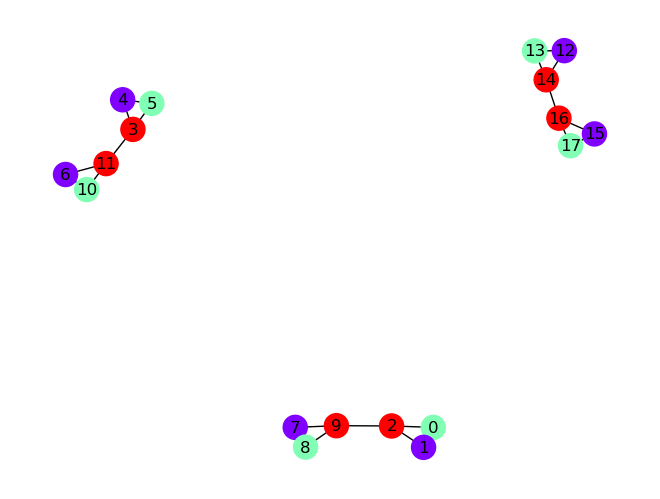

In [14]:
at.draw_network(initial_graph,X,with_labels=True)

In [16]:
p

array([1000])

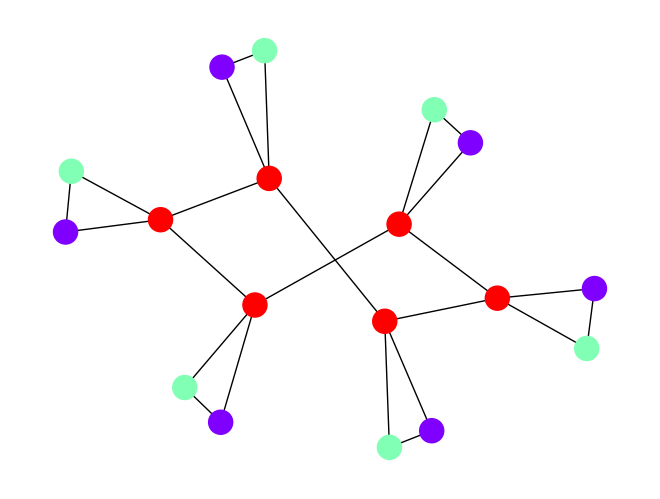

In [17]:
at.draw_network(samples[0],X)

In [20]:
rewire_est = False
t = 0
if not rewire_est or t==0:
    print('here')

here


In [6]:
initial_tree = mcmc.AssemblyTree(target,X,O,capacity)

In [7]:
mcmc0 = mcmc.DesignMCMC(initial_tree)

In [8]:
mcmc0.run_mcmc(10)

In [9]:
mcmc0.cur_T.Tree.show()

0
├── 1
├── 2
├── 3
├── 4
├── 5
├── 6
├── 7
├── 8
├── 9
├── 10
├── 11
├── 12
└── 13



In [11]:
leaves = mcmc0.cur_T.Tree.leaves()

In [13]:
[leaf for leaf in leaves if len(leaf.data.nodes) > 2]

[Node(tag=1, identifier=1, data=<mcmc.AssemblyNode object at 0x30d42d9a0>),
 Node(tag=2, identifier=2, data=<mcmc.AssemblyNode object at 0x30d42ec30>)]

In [14]:
[len(leaf.data.nodes) for leaf in leaves if len(leaf.data.nodes) > 2]

[3, 3]